In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
wine_data = pd.read_csv('/content/WineQT.csv')

In [3]:
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


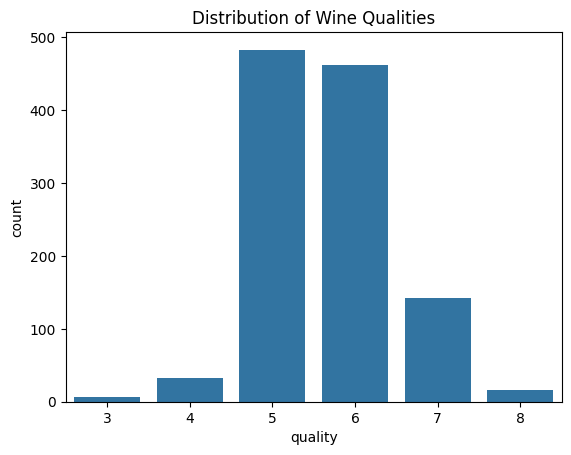

In [5]:
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Qualities')
plt.show()

In [6]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Stochastic Gradient Descent', SGDClassifier()),
    ('Support Vector Classifier', SVC())
]

In [9]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("="*50)

Model: Random Forest
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.76      0.74        96
           6       0.66      0.69      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.43      0.42       229
weighted avg       0.67      0.69      0.68       229

Accuracy: 0.6943231441048034
Model: Stochastic Gradient Descent
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.41      0.93      0.57        96
           6       0.43      0.03      0.06        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.40       229
   macro avg       0.17      0.19      0.13   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

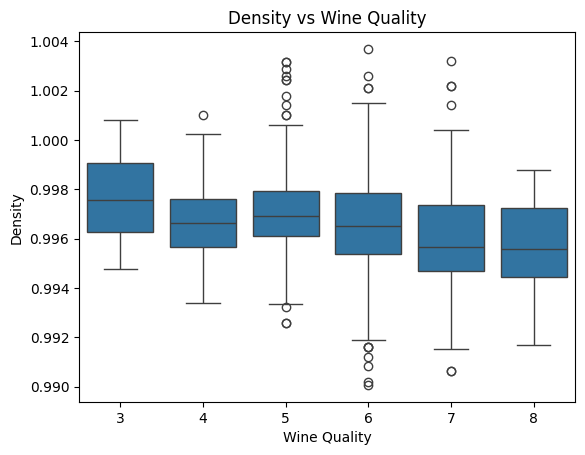

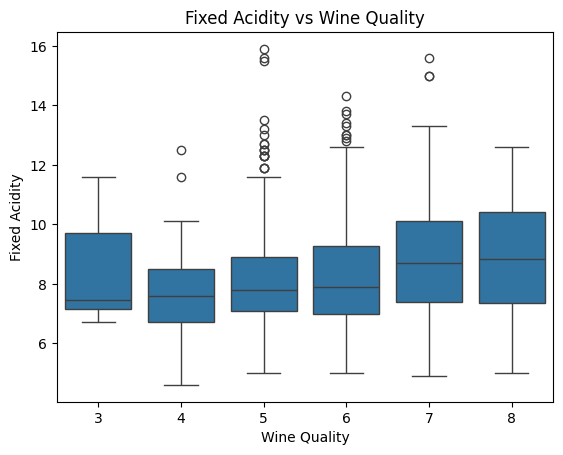

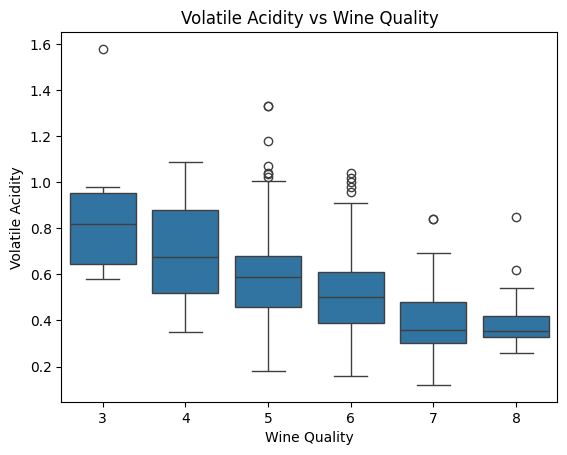

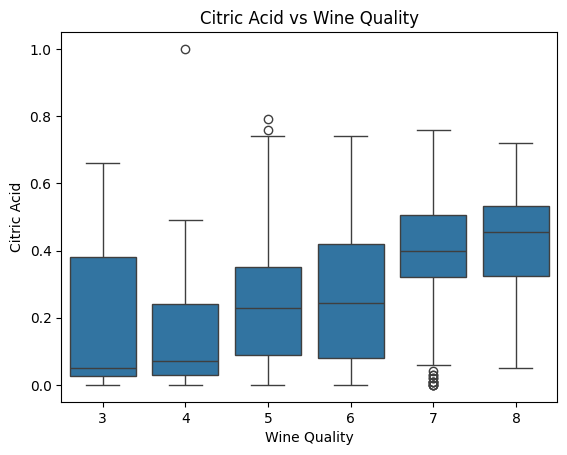

In [10]:
sns.boxplot(x='quality', y='density', data=wine_data)
plt.title('Density vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.show()

sns.boxplot(x='quality', y='fixed acidity', data=wine_data)
plt.title('Fixed Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()

sns.boxplot(x='quality', y='volatile acidity', data=wine_data)
plt.title('Volatile Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.show()

sns.boxplot(x='quality', y='citric acid', data=wine_data)
plt.title('Citric Acid vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid')
plt.show()


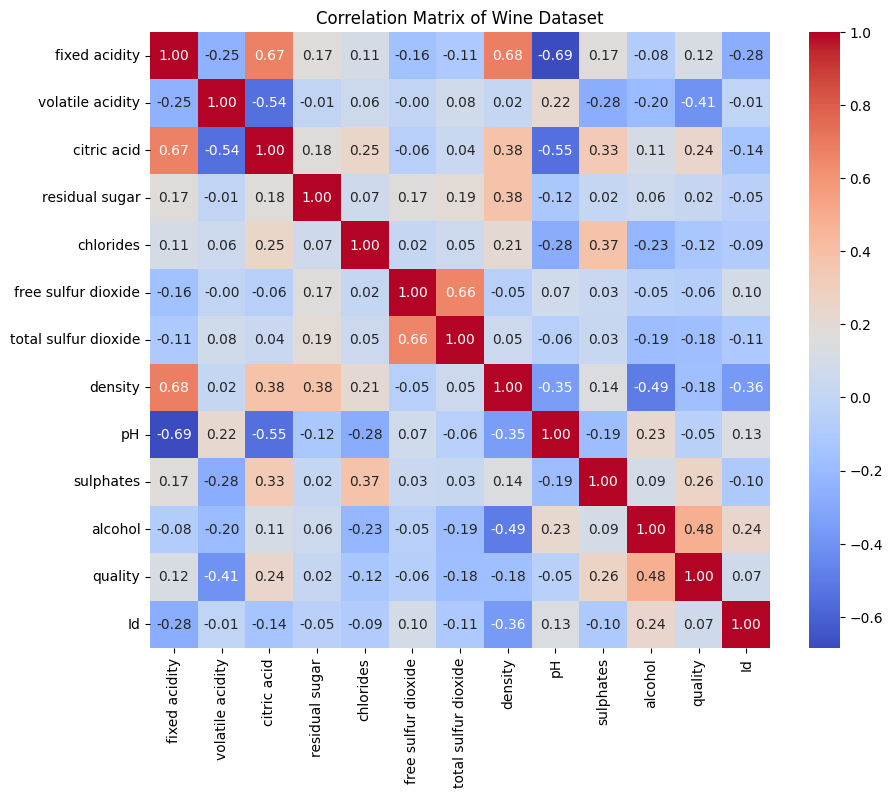

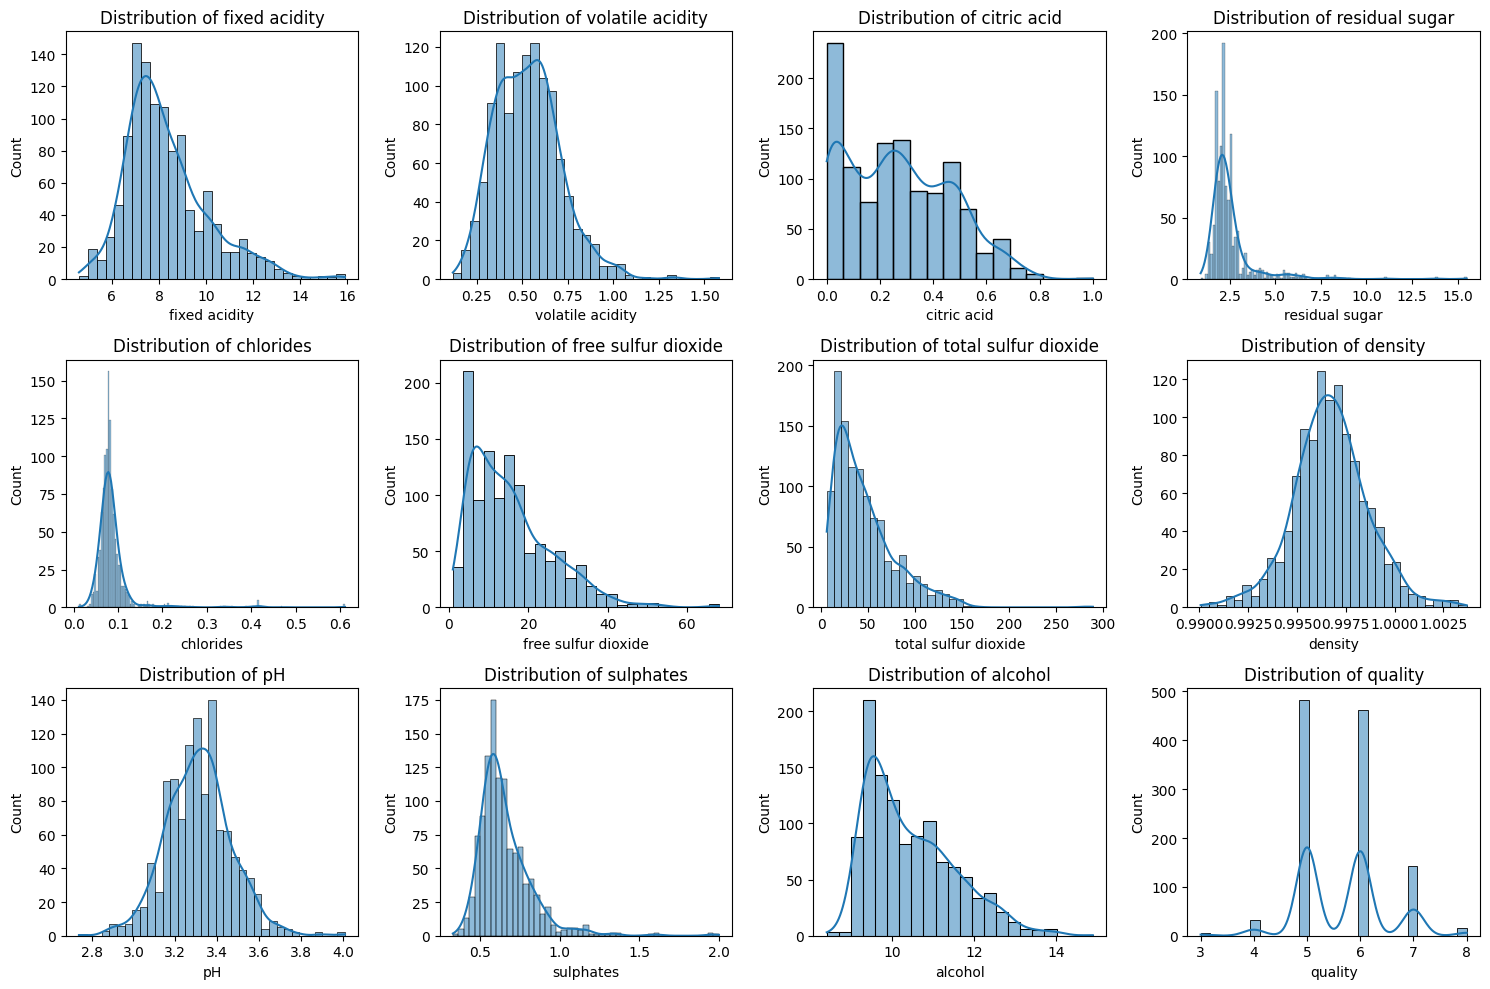

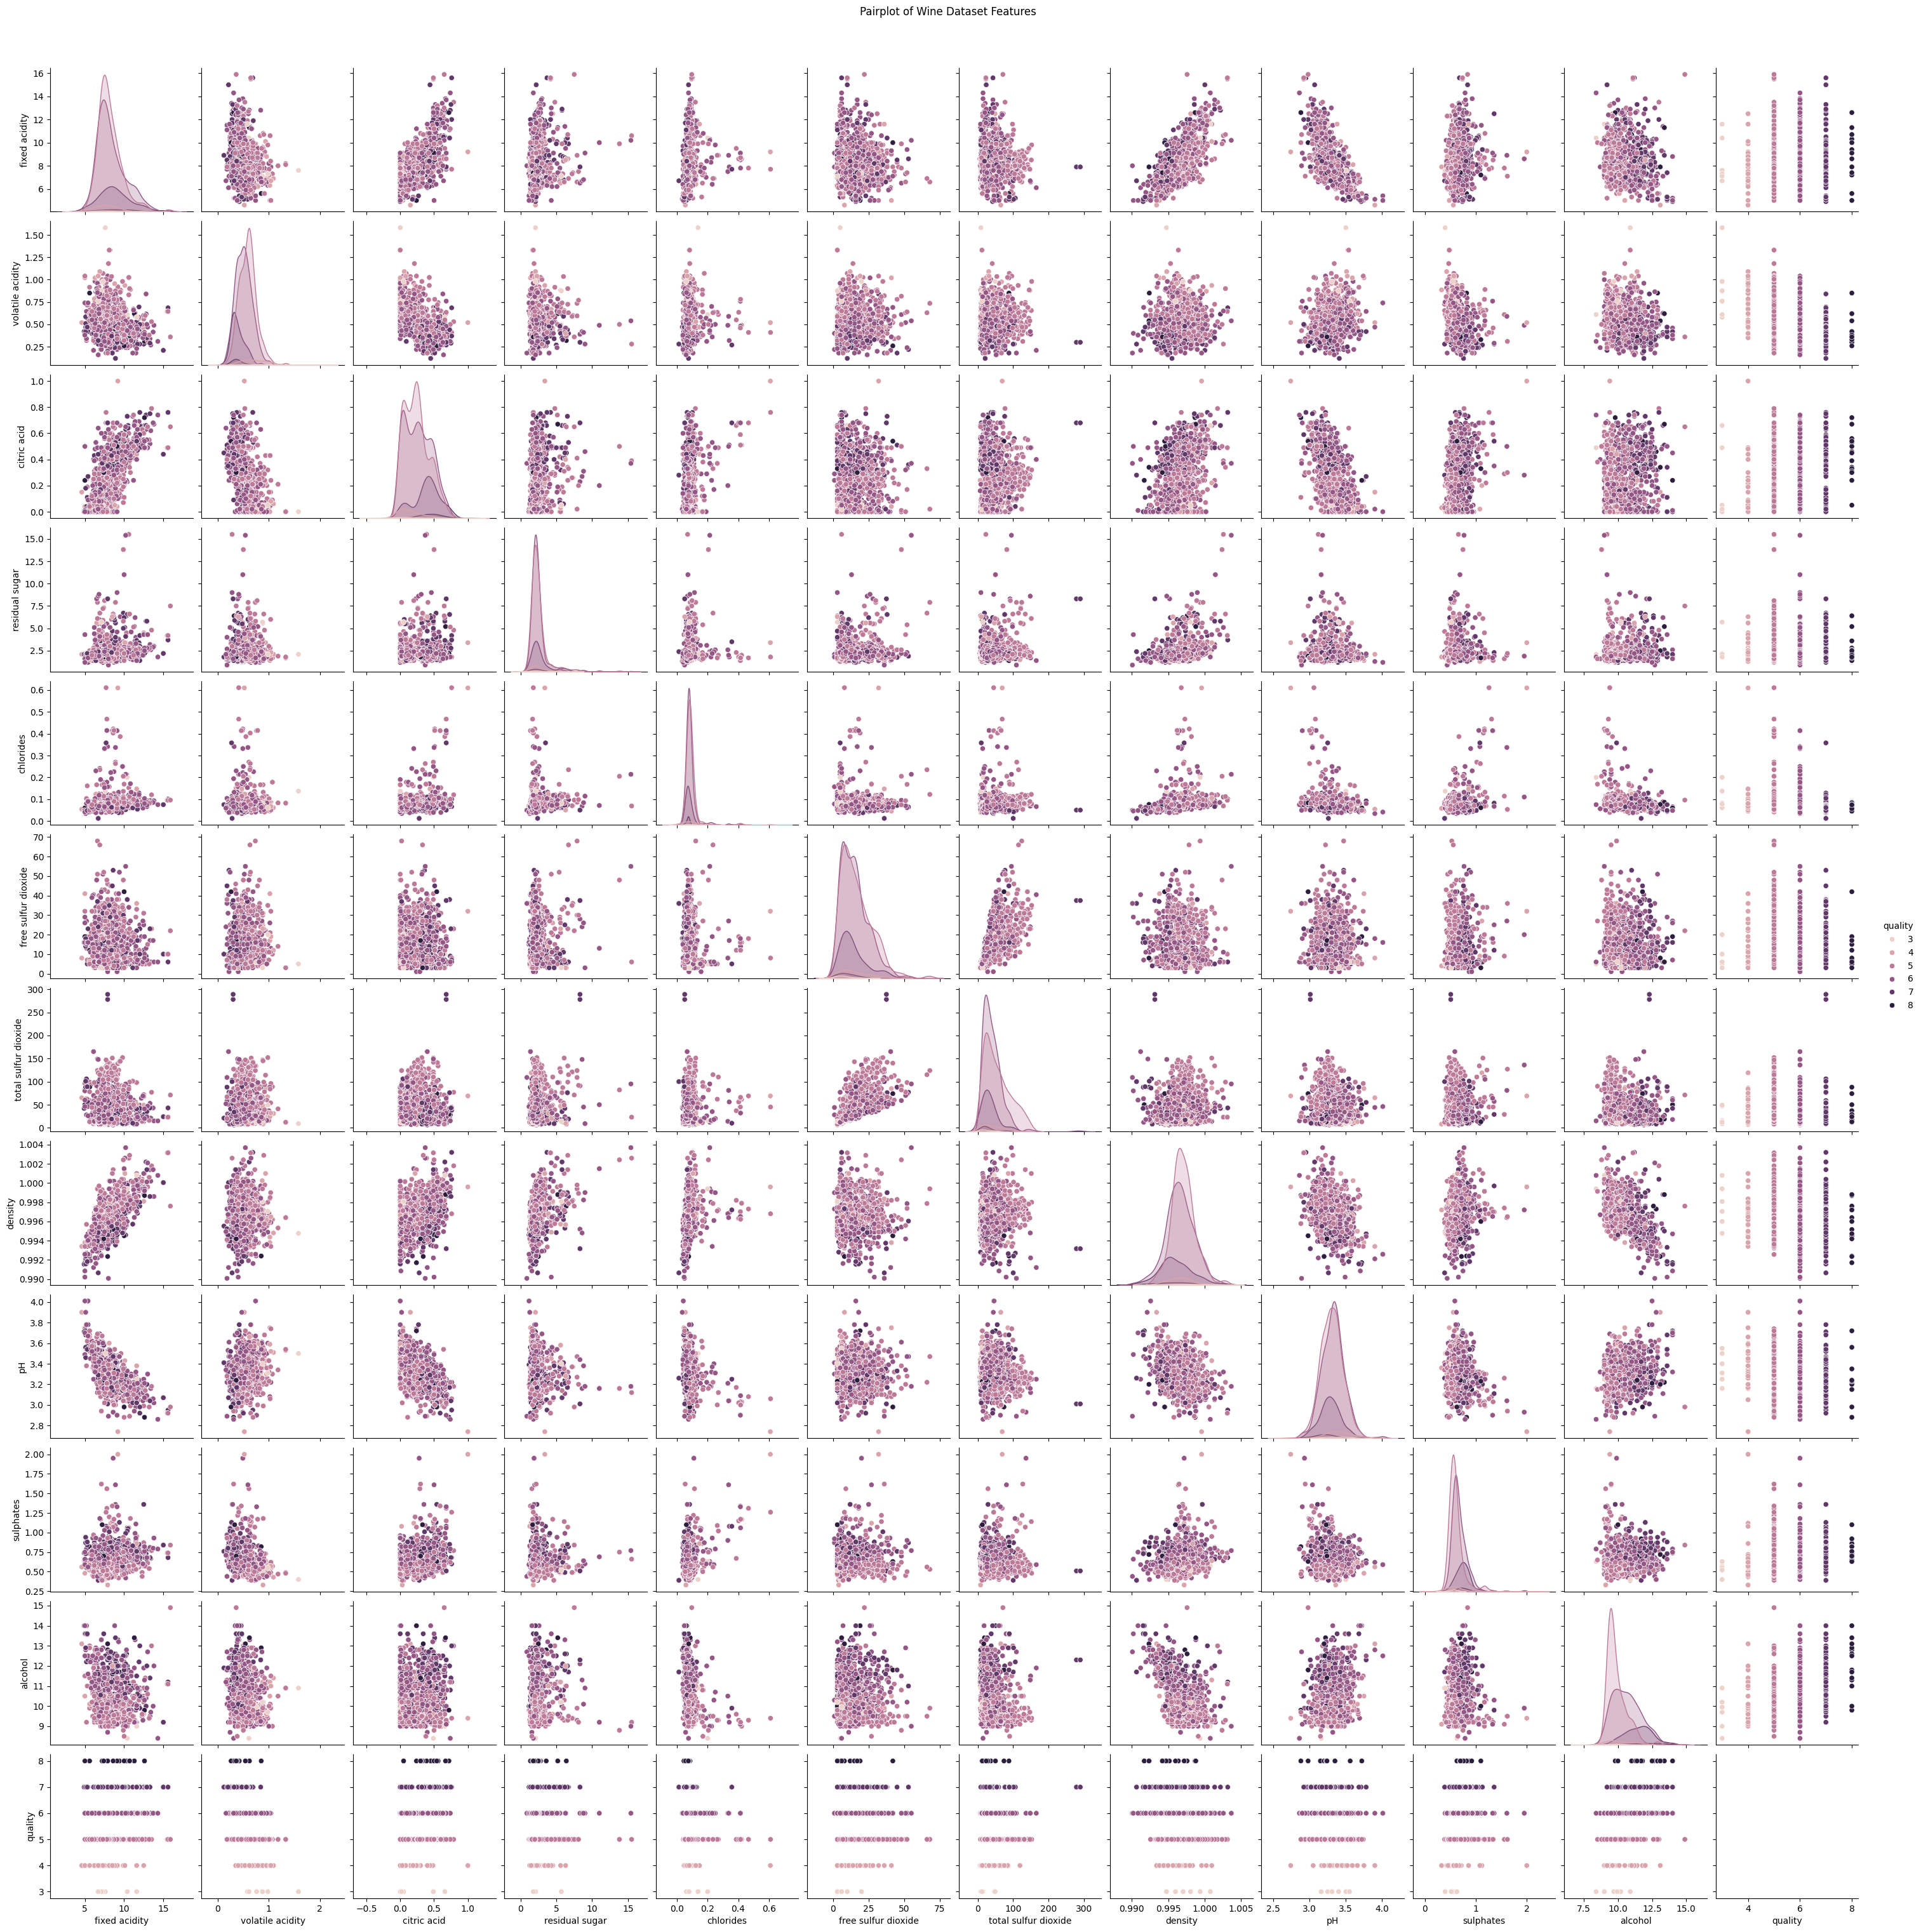

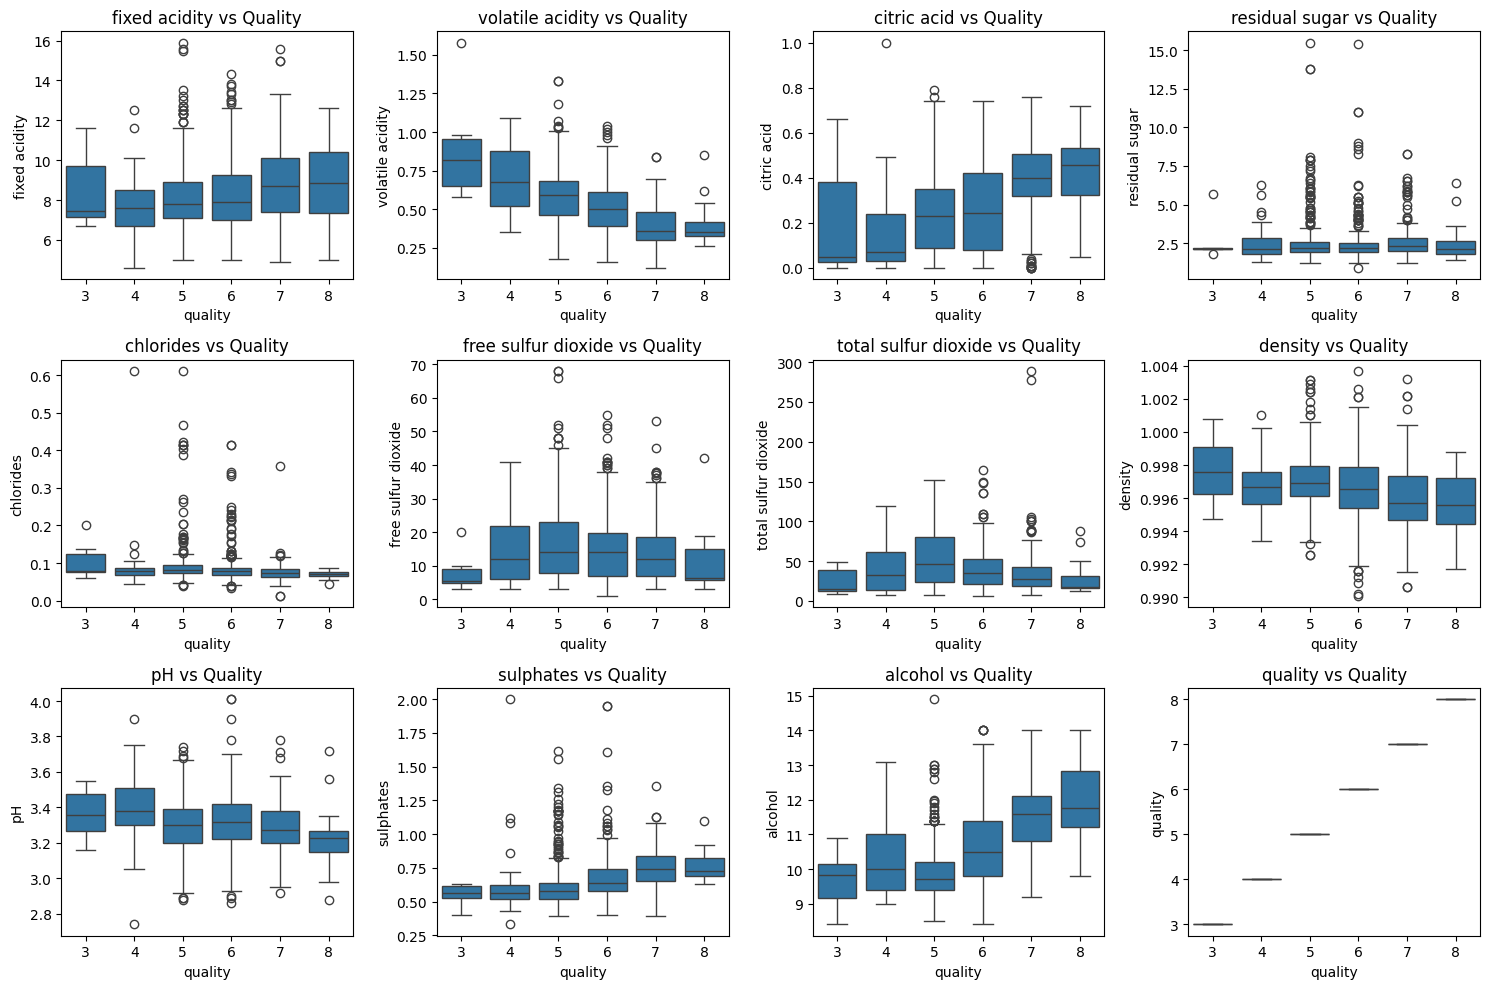

In [11]:
correlation_matrix = wine_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

features = wine_data.columns[:-1]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(wine_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

sns.pairplot(wine_data, vars=features, hue='quality', diag_kind='kde')
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='quality', y=feature, data=wine_data)
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()
